In [39]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pingouin
import seaborn as sns

wine=load_wine()
n_classes = len(wine['target_names'])
data_shape = wine['data'].shape

w_pd = pd.DataFrame(np.c_[wine['data'], wine['target']], columns=wine['feature_names']+['target'])
w_pd = w_pd.rename(columns={'od280/od315_of_diluted_wines': 'od280/od315'})

X_train, X_test, y_train, y_test = train_test_split(w_pd.iloc[:,:-1], w_pd['target'], test_size=0.3, random_state=42)
print(w_pd)
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤ {n_classes}, —Ñ–æ—Ä–º–∞ –¥–∞–Ω–Ω—ã—Ö {data_shape}')

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [40]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

## –†–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑

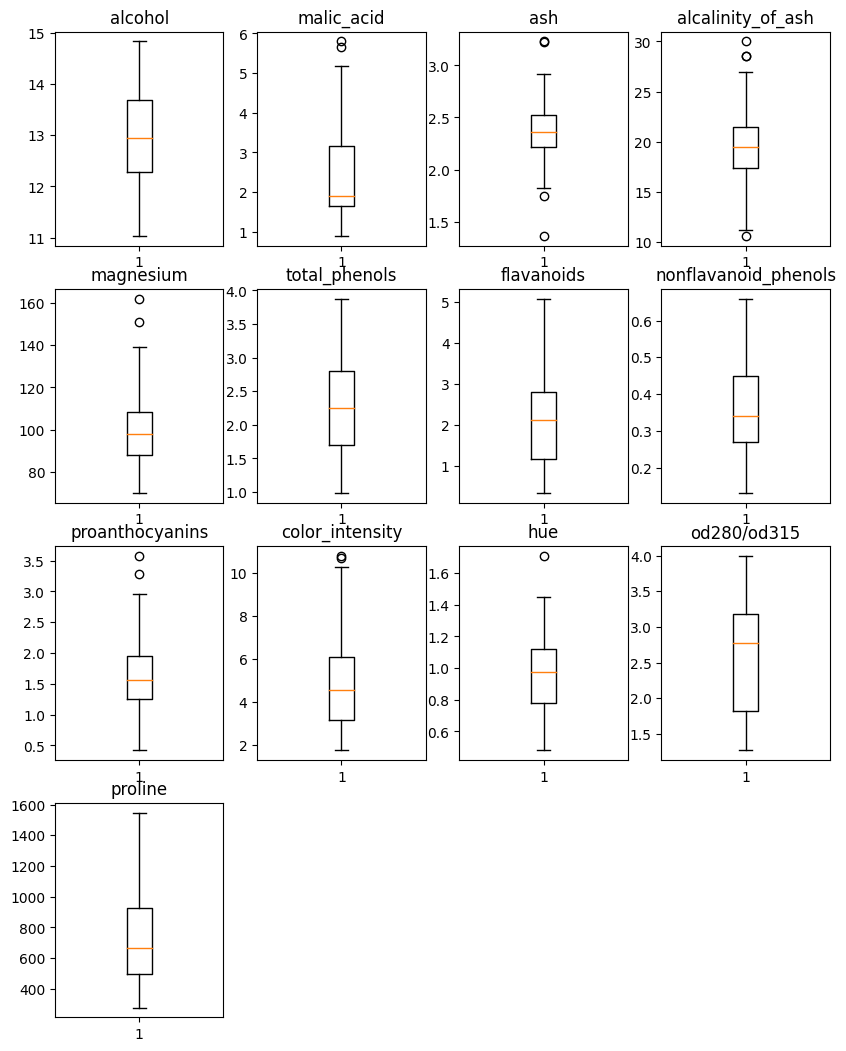

In [41]:
plt.figure(figsize=(10, 12.8))
for i, column in enumerate(X_train.columns):
    plt.subplot(4,4,i+1)
    plt.boxplot(X_train[column])
    plt.title(column)
plt.show()

–ú–Ω–æ–≥–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–º–µ—é—Ç –≤—ã–±—Ä–æ—Å—ã, –Ω–æ, –∏—Ö, —Å—É–¥—è –ø–æ –¥–∏–∞–≥—Ä–∞–º–º–µ –Ω–µ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ. –ß–∞—Å—Ç—å –¥–∏–∞–≥—Ä–∞–º–º —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã –∏ –∏–º–µ—é—Ç –Ω–µ –æ—á–µ–Ω—å –¥–ª–∏–Ω–Ω—ã–µ —É—Å—ã. –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∂–µ –Ω–µ—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã –∏–ª–∏ –∏–º–µ—é—Ç –¥–ª–∏–Ω–Ω—ã–µ —É—Å—ã.

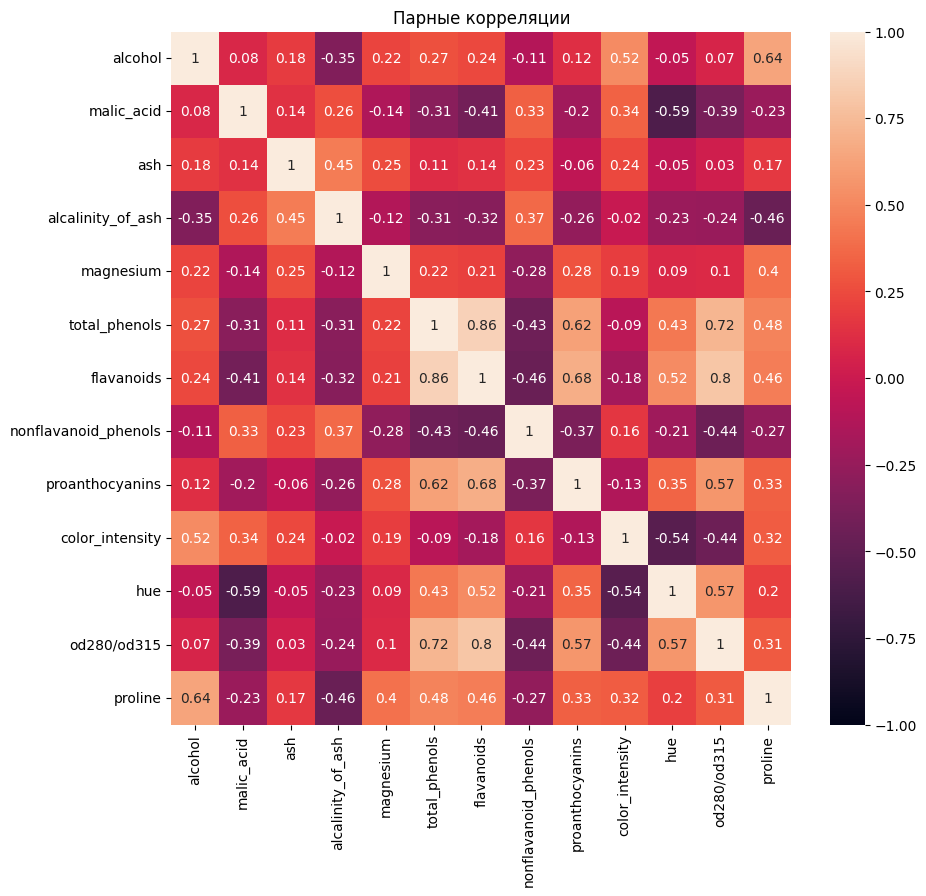

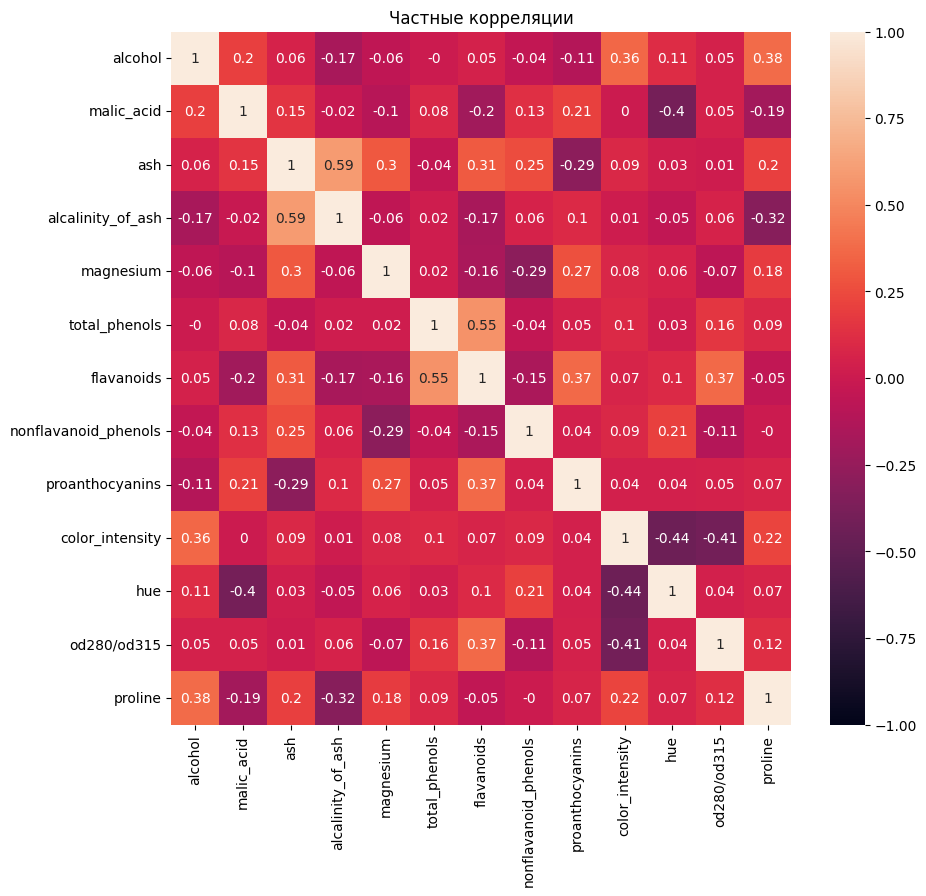

In [42]:
w_corr = X_train.corr()
w_pcorr = X_train.pcorr()
plt.figure(figsize=(10, 9))
sns.heatmap(w_corr.round(2), vmin=-1, vmax=1, annot=True)
plt.title('–ü–∞—Ä–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏')
plt.show()

plt.figure(figsize=(10, 9))
sns.heatmap(w_pcorr.round(2), vmin=-1, vmax=1, annot=True)
plt.title('–ß–∞—Å—Ç–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏')
plt.show()

–ù–µ–∫–æ—Ç–æ—Ä—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –∏–º–µ—é—Ç —Å–∏–ª—å–Ω—ã–µüí™ –ø–∞—Ä–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è —á–µ—Ä–µ–∑ –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é. –û–¥–Ω–∞–∫–æ, –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∑–∞–º–µ—Ç–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Å–≤—è–∑–∏ –Ω–µ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç.

–ò–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –∫–æ–º–ø–æ–Ω–µ–Ω—Ç: [0.36 0.19 0.12 0.08 0.07 0.05 0.04 0.03 0.02 0.02 0.02 0.01 0.01]
–ò–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å: 66.62%


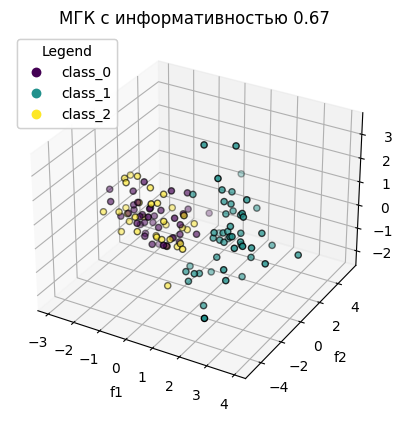

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

pca = PCA()
x_pca = pca.fit_transform(x_scaled, y_train)
x_test_pca = pca.transform(x_test_scaled)
data_delta = pca.explained_variance_ratio_
x_pca_pd = pd.DataFrame(x_pca, columns=[ f'f{i}' for i in range(len(X_train.columns))])
x_test_pca_pd = pd.DataFrame(x_test_pca, columns=[ f'f{i}' for i in range(len(X_test.columns))])

print(f'–ò–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –∫–æ–º–ø–æ–Ω–µ–Ω—Ç: {(data_delta).round(2)}')
print(f'–ò–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å: {100*sum(data_delta[:3]):.2f}%')

def scatter3d(data_pd, columns, classes=None, classes_names=None, title=''):
    ax = plt.axes(projection='3d')

    x = data_pd[columns[0]]
    y = data_pd[columns[1]]
    z = data_pd[columns[2]]

    if classes_names is not None:
        scatter1 = ax.scatter(x, y, z, c=classes, marker='o', edgecolors=['000']*len(x))
        legend1 = ax.legend(*[scatter1.legend_elements()[0],classes_names], 
                            title="Legend", loc='upper left')
        ax.add_artist(legend1)
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_zlabel(columns[2])
    plt.title(title)

scatter3d(x_pca_pd, columns=['f1','f2','f3'], classes=y_train, classes_names=wine['target_names'], title=f'–ú–ì–ö —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å—é {sum(data_delta[:3]):.2f}')
plt.show()

–ü–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –∏–º–µ–µ—Ç –Ω–µ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å (–æ–∫–ª–æ 67%), –Ω–æ –ø–æ –Ω–µ–π –≤—Å—ë —Ä–∞–≤–Ω–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –≤—ã–≤–æ–¥—ã, —É—á–∏—Ç—ã–≤–∞—è —Ç–æ, —á—Ç–æ –æ–Ω–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–µ –≤—Å—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –≤—ã–±–æ—Ä–∫–µ. –¢–∞–∫, –∑–¥–µ—Å—å –≤–∏–¥–Ω–æ, —á—Ç–æ –ø–µ—Ä–≤—ã–π –∫–ª–∞—Å—Å –¥–æ–≤–æ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–æ –¥–æ–ª–∂–µ–Ω –æ—Ç–¥–µ–ª—è—Ç—å—Å—è –æ—Ç –¥–≤—É—Ö –¥—Ä—É–≥–∏—Ö, –ø–æ —Å–∫–æ–ª—å–∫—É –æ–Ω –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–º –∫–ª–∞—Å—Ç–µ—Ä–µ. –¢–∞–∫–∂–µ, –ø–æ –∫–∞—Ä—Ç–∏–Ω–∫–µ –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –ø–µ—Ä–≤—ã–π –∫–ª–∞—Å—Å —è–≤–ª—è–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–æ –æ—Ç–¥–µ–ª–∏–º—ã–º. –î–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –≤–∏–¥–Ω–æ –¥–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–∞.

c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


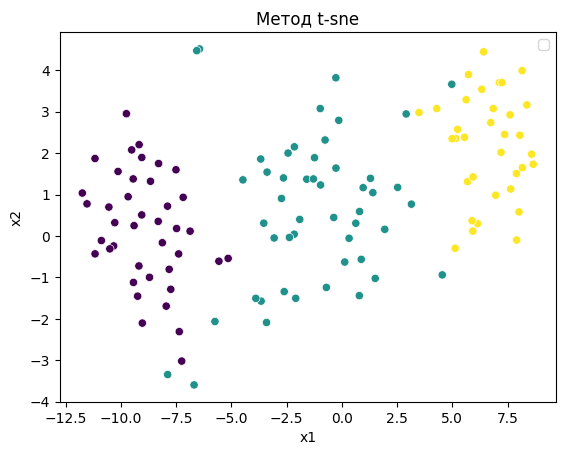

In [44]:
from sklearn.manifold import TSNE

t_sne = TSNE()
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(x_scaled)
tsne_data =pd.DataFrame(tsne_data,columns=['x1','x2'])
sns.scatterplot(data=tsne_data, x='x1', y='x2', c=y_train)
plt.title('–ú–µ—Ç–æ–¥ t-sne')
plt.legend()
plt.show()

–í –¥–∞–Ω–Ω–æ–º –º–µ—Ç–æ–¥–µ –≤–∏–¥–Ω–æ, —á—Ç–æ 3 –∫–ª–∞—Å—Å–∞ –¥–æ–≤–æ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–æ –≤–∏–∑—É–∞–ª—å–Ω–æ —Ä–∞–∑–¥–µ–ª–∏–º—ã. –ó–Ω–∞—á–∏—Ç, –∏—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –≤–æ–∑–º–æ–∂–Ω–∞ –∏, –ø—Ä–∏ —ç—Ç–æ–º, —Å –¥–æ–≤–æ–ª—å–Ω–æ –±–æ–ª—å—à–æ–π —Ö–æ—Ä–æ—à–µ–π —Ä–∞–∑–¥–µ–ª–∏–º–æ—Å—Ç—å—é. –¢–∞–∫–∂–µ –Ω–∞ –¥–∞–Ω–Ω–æ–º –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–∏ –≤–∏–¥–Ω–æ 3 –∫–ª–∞—Å—Ç–µ—Ä–∞, –∫–æ—Ç–æ—Ä—ã–µ —è–≤–Ω–æ –º–æ–≥—É—Ç –±—ã—Ç—å –≤—ã–¥–µ–ª–µ–Ω—ã.

In [45]:
from sklearn import linear_model

features = X_train.shape[1] - 1
n = X_train.shape[0]

y_columns = X_train.columns
l_regs = dict()
l_columns = dict()
data = dict()

#train
for col in y_columns:
    l_columns[col] = list(X_train.columns)
    l_columns[col].remove(col)
    X = X_train[l_columns[col]].values.reshape(-1, features)
    y = X_train[col].values.reshape(-1, 1)

    data[col] = (X, y)

    l_reg = linear_model.LinearRegression()
    l_reg.fit(X, y)
    l_regs[col] = l_reg


R_squared = dict()
std_coeffs = dict()
y_pred = dict()
RMSE = dict()

def get_std_coeffs(coeffs, std_pd, col, l_columns):
    scale = np.array([ std_pd[i] / std_pd[col] for i in l_columns[col] ])
    return pd.Series(data=(coeffs*scale).flatten(), index=l_columns[col])

#test
train_std = X_train.std(ddof=1)
for col in y_columns:
    X = X_train[l_columns[col]].values.reshape(-1, features)
    y = X_train[col].values.reshape(-1, 1)
    test_X = X_test[l_columns[col]].values.reshape(-1, features)
    test_y = X_test[col].values.reshape(-1, 1)
    
    R_squared[col] = l_regs[col].score(X, y)
    std_coeffs[col] = get_std_coeffs(l_regs[col].coef_, train_std, col, l_columns)
    y_pred = l_regs[col].predict(test_X)
    err = test_y - y_pred
    RMSE[col] = np.sqrt(err.T.dot(err) / n).item()
    

print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –ø–æ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ")
print(pd.Series(R_squared))
print('\nRMSE –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ')
print(pd.Series(RMSE))

print('\n–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —É—Ä–∞–≤–Ω–µ–Ω–∏–π –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–π')
print(pd.concat(std_coeffs, axis=1).round(2))

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –ø–æ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
alcohol                 0.568887
malic_acid              0.463506
ash                     0.559340
alcalinity_of_ash       0.563521
magnesium               0.333205
total_phenols           0.767625
flavanoids              0.859803
nonflavanoid_phenols    0.407465
proanthocyanins         0.555500
color_intensity         0.667392
hue                     0.602526
od280/od315             0.748157
proline                 0.643946
dtype: float64

RMSE –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
alcohol                   0.296417
malic_acid                0.723383
ash                       0.133360
alcalinity_of_ash         1.406162
magnesium                 7.819086
total_phenols             0.186680
flavanoids                0.274670
nonflavanoid_phenols      0.058318
proanthocyanins           0.322052
color_intensity           1.047468
hue                       0.090987
od280/od315               0.247162
prol

–ü–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –º–µ—Ç—Ä–∏–∫–∞–º –≤–∏–¥–Ω–æ, —á—Ç–æ –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ–ª—É—á–∏–ª–∏—Å—å –Ω–µ–ø–ª–æ—Ö–∏–µ –ª–∏–Ω–µ–π–Ω—ã–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (od280/od315, total_phenols, flavonoids), –∏–º–µ—é—â–∏–µ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏—é –±–æ–ª–µ–µ 0.7. –≠—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–∂–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –ø–æ –æ—Å—Ç–∞–ª—å–Ω—ã–º. –¢–∞–∫–∂–µ, —Å—Ç–æ–∏—Ç –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –¥–ª—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –ø–æ–ª—É—á–∏–≤—à–∏—Ö –º–∞–ª–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –ø–æ–ª—É—á–µ–Ω—ã —Ö–æ—Ä–æ—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è RMSE. –ù–∞–ø—Ä–∏–º–µ—Ä, –∫ –Ω–∏–º –º–æ–∂–Ω–æ –æ—Ç–Ω–µ—Å—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä hue. –í —Ü–µ–ª–æ–º, —Ç–∞–∫–æ–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏–º–µ—é—â–∏—Ö –≤—ã–±—Ä–æ—Å—ã. –¢–∞–∫–∂–µ, –ø–æ–ª—É—á–µ–Ω—ã —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —É—Ä–∞–≤–Ω–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ —Ä–µ–≥—Ä–µ—Å—Å–∏–π. –ü–æ –Ω–∏–º –≤–∏–¥–Ω–æ, —á—Ç–æ –º–Ω–æ–≥–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≤ —ç—Ç–∏—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏—è—Ö –º–∞–ª–æ–∑–Ω–∞—á–∏–º—ã, –∏ –∏—Ö –º–æ–∂–Ω–æ –∏—Å–∫–ª—é—á–∏—Ç—å –∏–∑ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —É–ø—Ä–æ—Å—Ç–∏–≤ –º–æ–¥–µ–ª—å –±–µ–∑ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–≥–æ —É—Ö—É–¥—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞.

## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

–°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –≤—ã–±–æ—Ä–æ–∫
test_accuracy           0.937179
test_recall_micro       0.937179
test_recall_macro       0.935556
test_precision_micro    0.937179
test_precision_macro    0.950000
test_f1_micro           0.937179
test_f1_macro           0.937047
dtype: float64 

–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.91      0.95        23
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



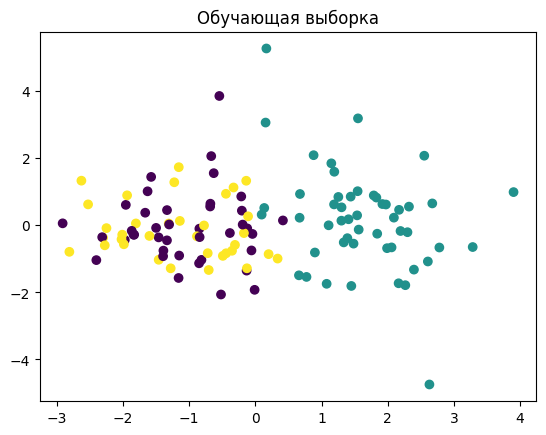

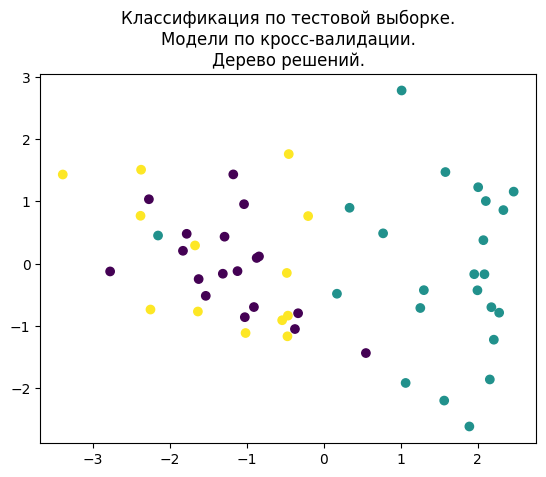

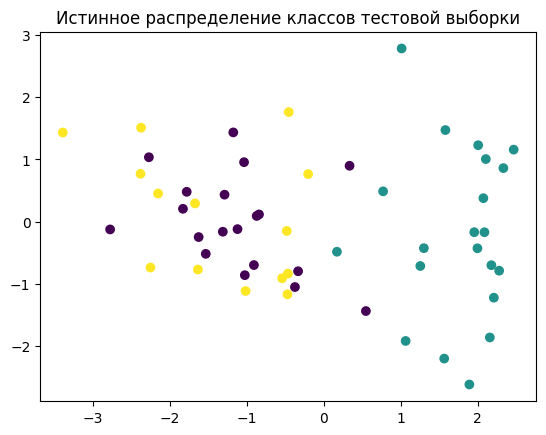

In [46]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn import tree

scores1 = ['accuracy', 'recall_micro', 'recall_macro', 'precision_micro', 'precision_macro', 'f1_micro', 'f1_macro']
n_classes = len(set(y_train))

def models_predict(models, X, n_classes):
    proba = np.zeros((X.shape[0], n_classes))
    for model in models:
        proba += model.predict_proba(X)
    proba /= len(models)
    y_pred = proba.argmax(axis=1)
    return y_pred
    
cross_validation_res = cross_validate(tree.DecisionTreeClassifier(max_depth=4), X_train, y_train, cv = 10, scoring = scores1, return_estimator=True)
scores=pd.DataFrame(cross_validation_res).drop(['fit_time', 'score_time', 'estimator'], axis=1).mean(axis=0)
models = cross_validation_res['estimator']
y_pred = models_predict(models, X_test, n_classes)
print('–°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –≤—ã–±–æ—Ä–æ–∫')
print(scores, '\n')

print('–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ')
print(classification_report(y_pred, y_test)) 

plt.scatter(x='f1', y='f2', data=x_pca_pd, c=y_train)
plt.title('–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞')
plt.show()


plt.scatter(x='f1', y='f2', data=x_test_pca_pd, c=y_pred)
plt.title('–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.\n–ú–æ–¥–µ–ª–∏ –ø–æ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏.\n–î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π.')
plt.show()


plt.scatter(x='f1', y='f2', data=x_test_pca_pd, c=y_test)
plt.title('–ò—Å—Ç–∏–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏')
plt.show()

In [47]:
from catboost import CatBoostClassifier
from catboost import metrics
custom_metric=[metrics.Accuracy(), metrics.F1(), metrics.Precision(), metrics.Recall()]

clf = CatBoostClassifier(
    random_seed=0,
    verbose=False,
    custom_metric = custom_metric
)
params = {'learning_rate': np.arange(0.03, 0.1, 0.01),
          'iterations': range(2, 10),
        'depth': range(2,6),
        'l2_leaf_reg': [1, 2]}

import os
import sys
a = sys.stdout
f = open(os.devnull, 'w')
grig_clf = clf.grid_search(params,X_train,y=y_train,cv=10,verbose=False,log_cout=f)
f.close()
print('–ù–∞–π–¥–µ–Ω–Ω—ã–µ –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã')

best_params = grig_clf.get('params')
print(pd.Series(best_params))

–ù–∞–π–¥–µ–Ω–Ω—ã–µ –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
depth            3.0
l2_leaf_reg      1.0
iterations       9.0
learning_rate    0.1
dtype: float64


–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        21
         1.0       0.90      1.00      0.95        19
         2.0       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



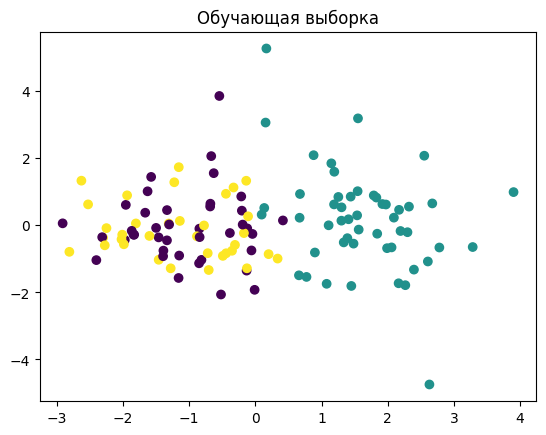

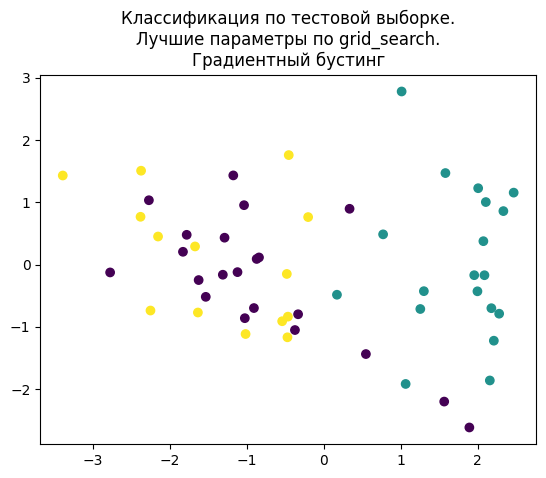

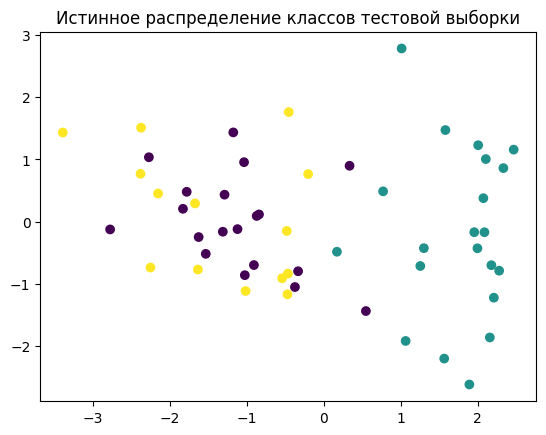

In [48]:
best_clf = CatBoostClassifier(
    random_seed=0,
    verbose=False,
    custom_metric = custom_metric,
    **best_params
)
best_clf.fit(X_train, y_train)
y_pred=best_clf.predict(X_test)

print('–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ')
print(classification_report(y_pred, y_test)) 

plt.scatter(x='f1', y='f2', data=x_pca_pd, c=y_train)
plt.title('–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞')
plt.show()


plt.scatter(x='f1', y='f2', data=x_test_pca_pd, c=y_pred)
plt.title('–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ grid_search.\n–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥')
plt.show()


plt.scatter(x='f1', y='f2', data=x_test_pca_pd, c=y_test)
plt.title('–ò—Å—Ç–∏–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏')
plt.show()

## –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è

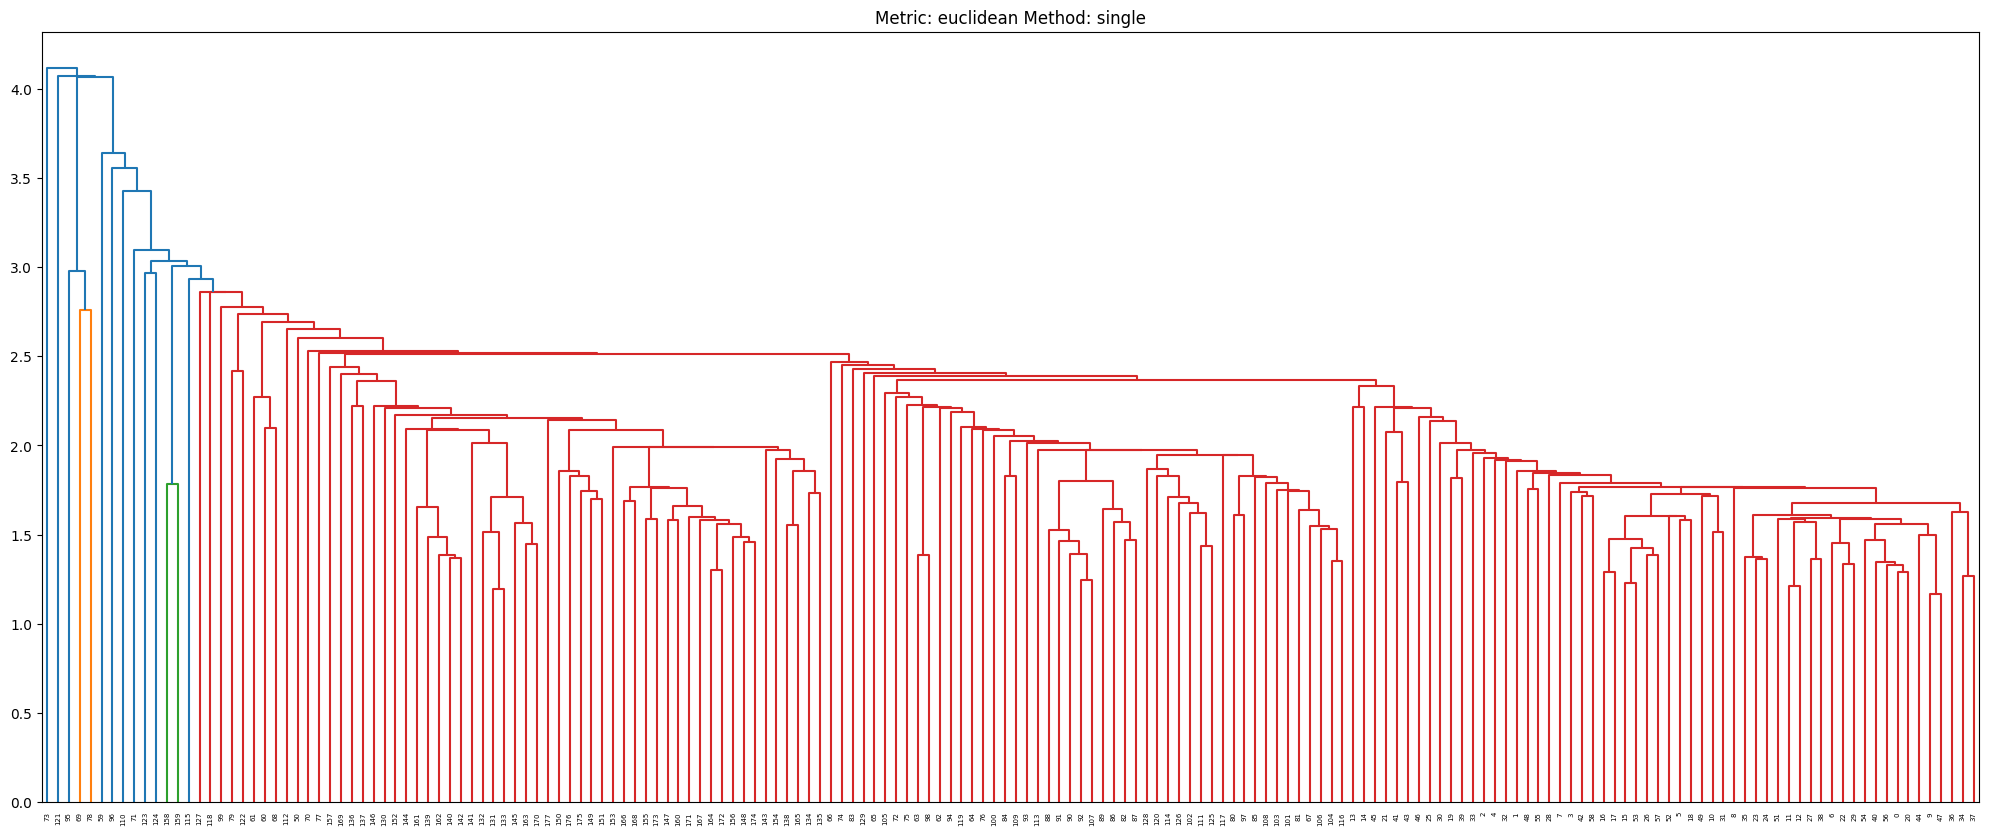

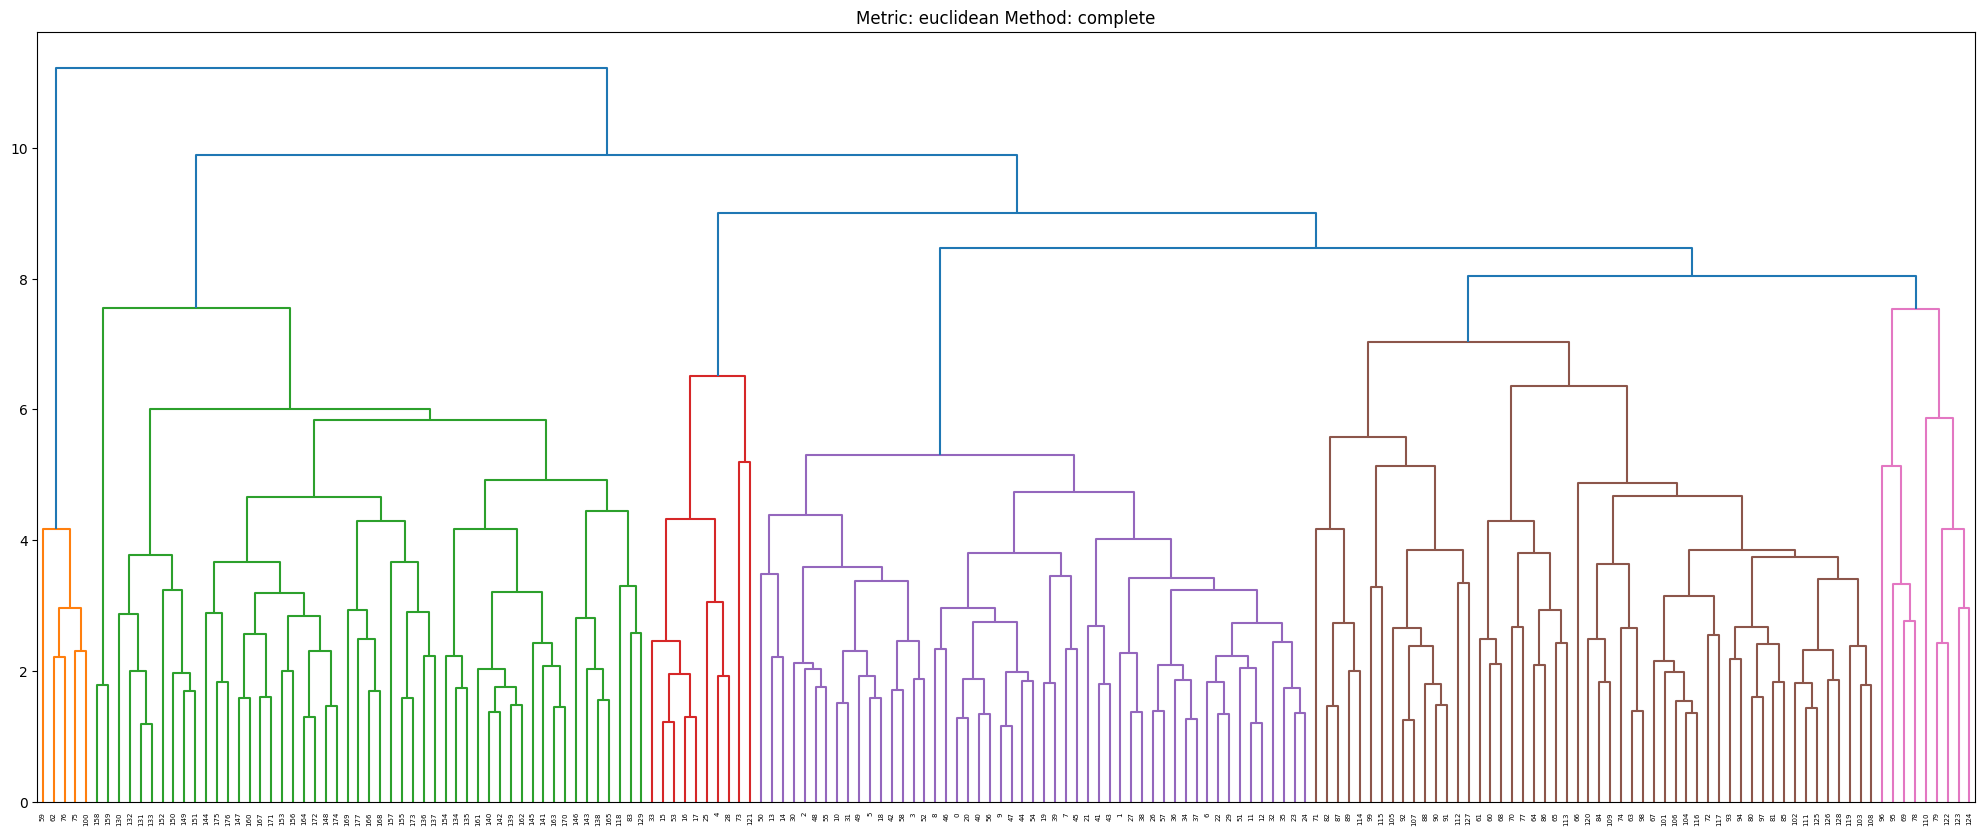

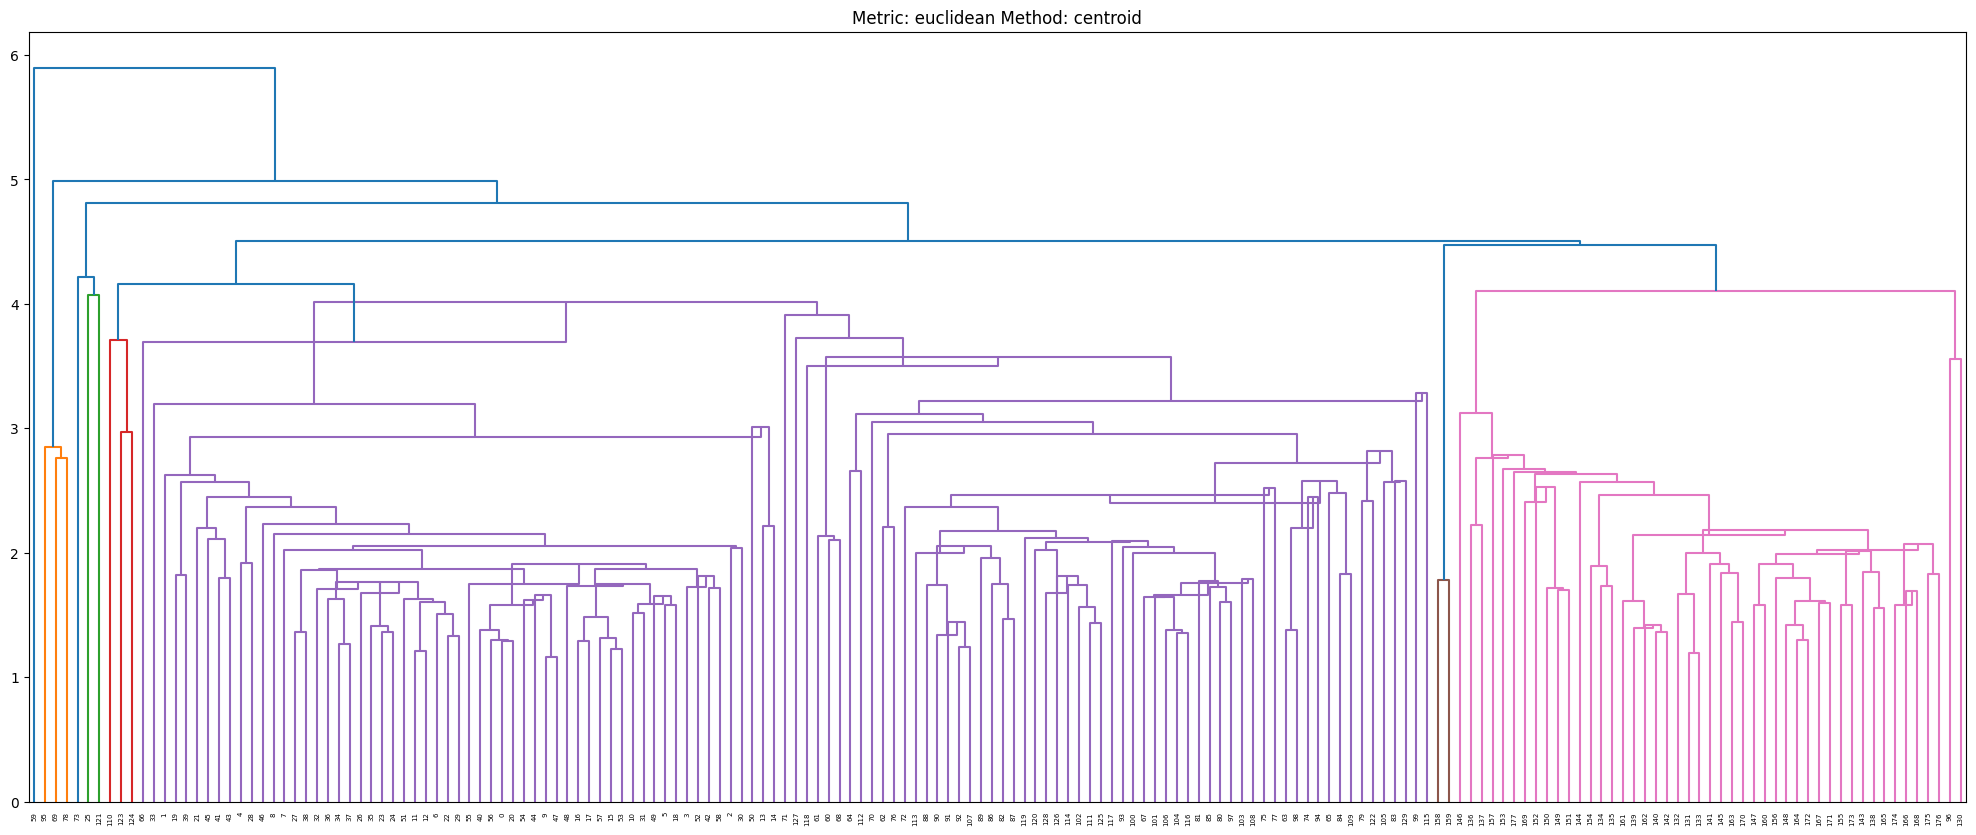

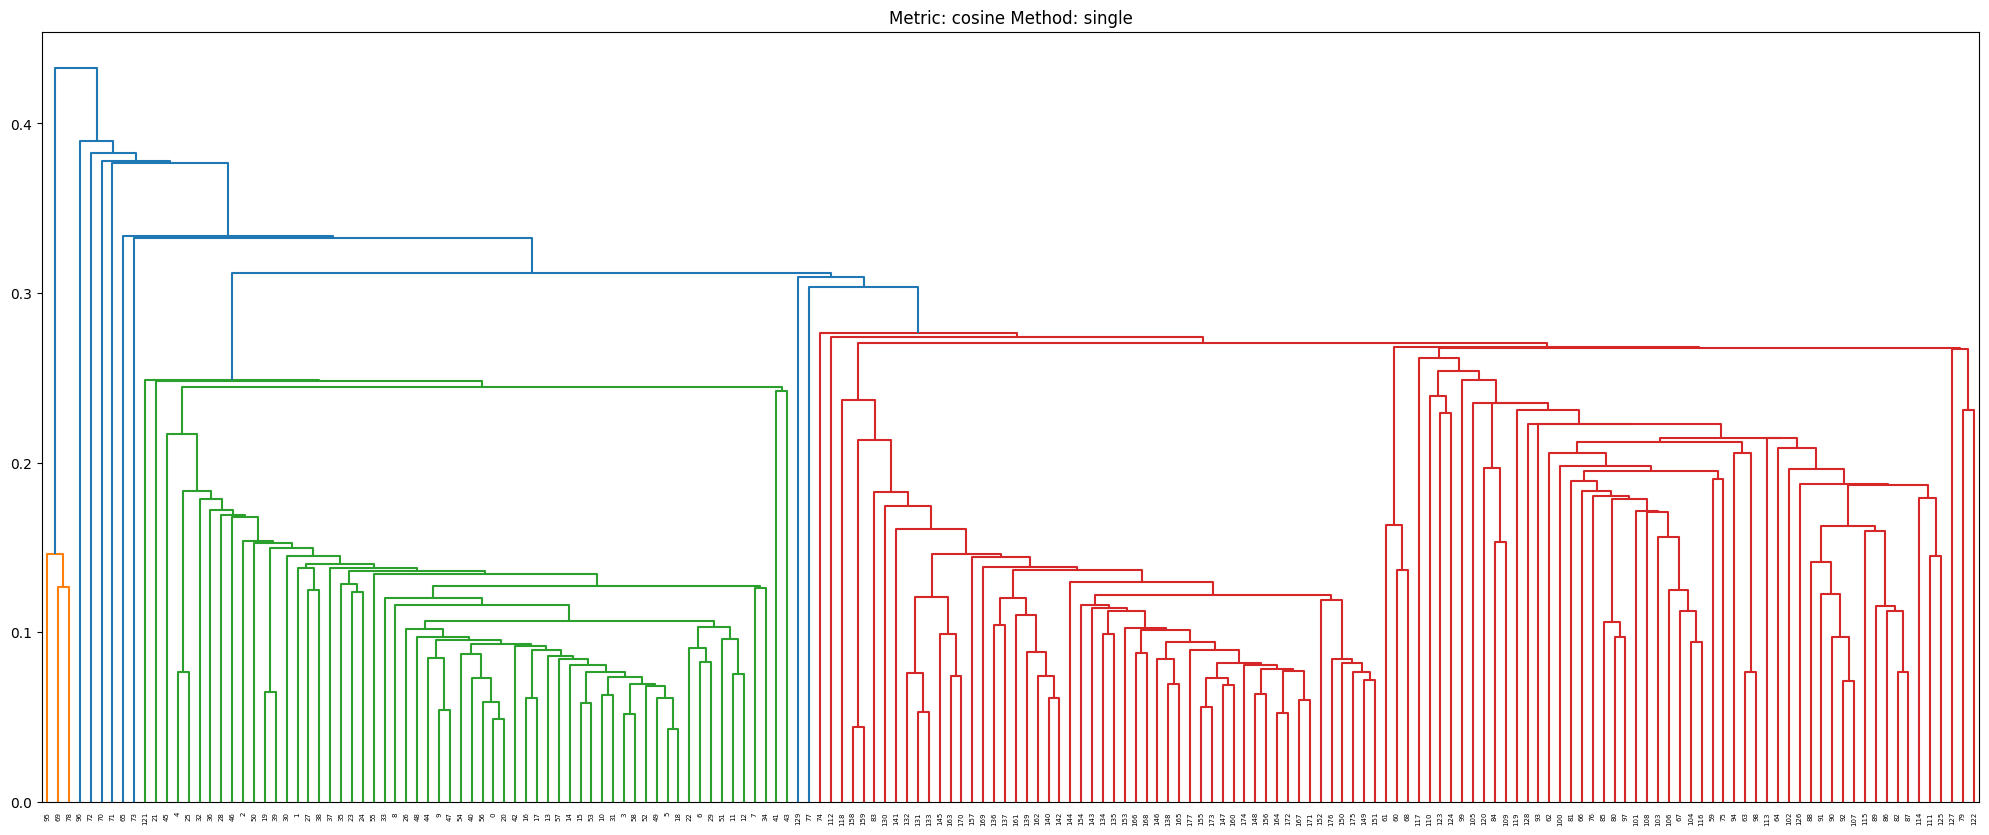

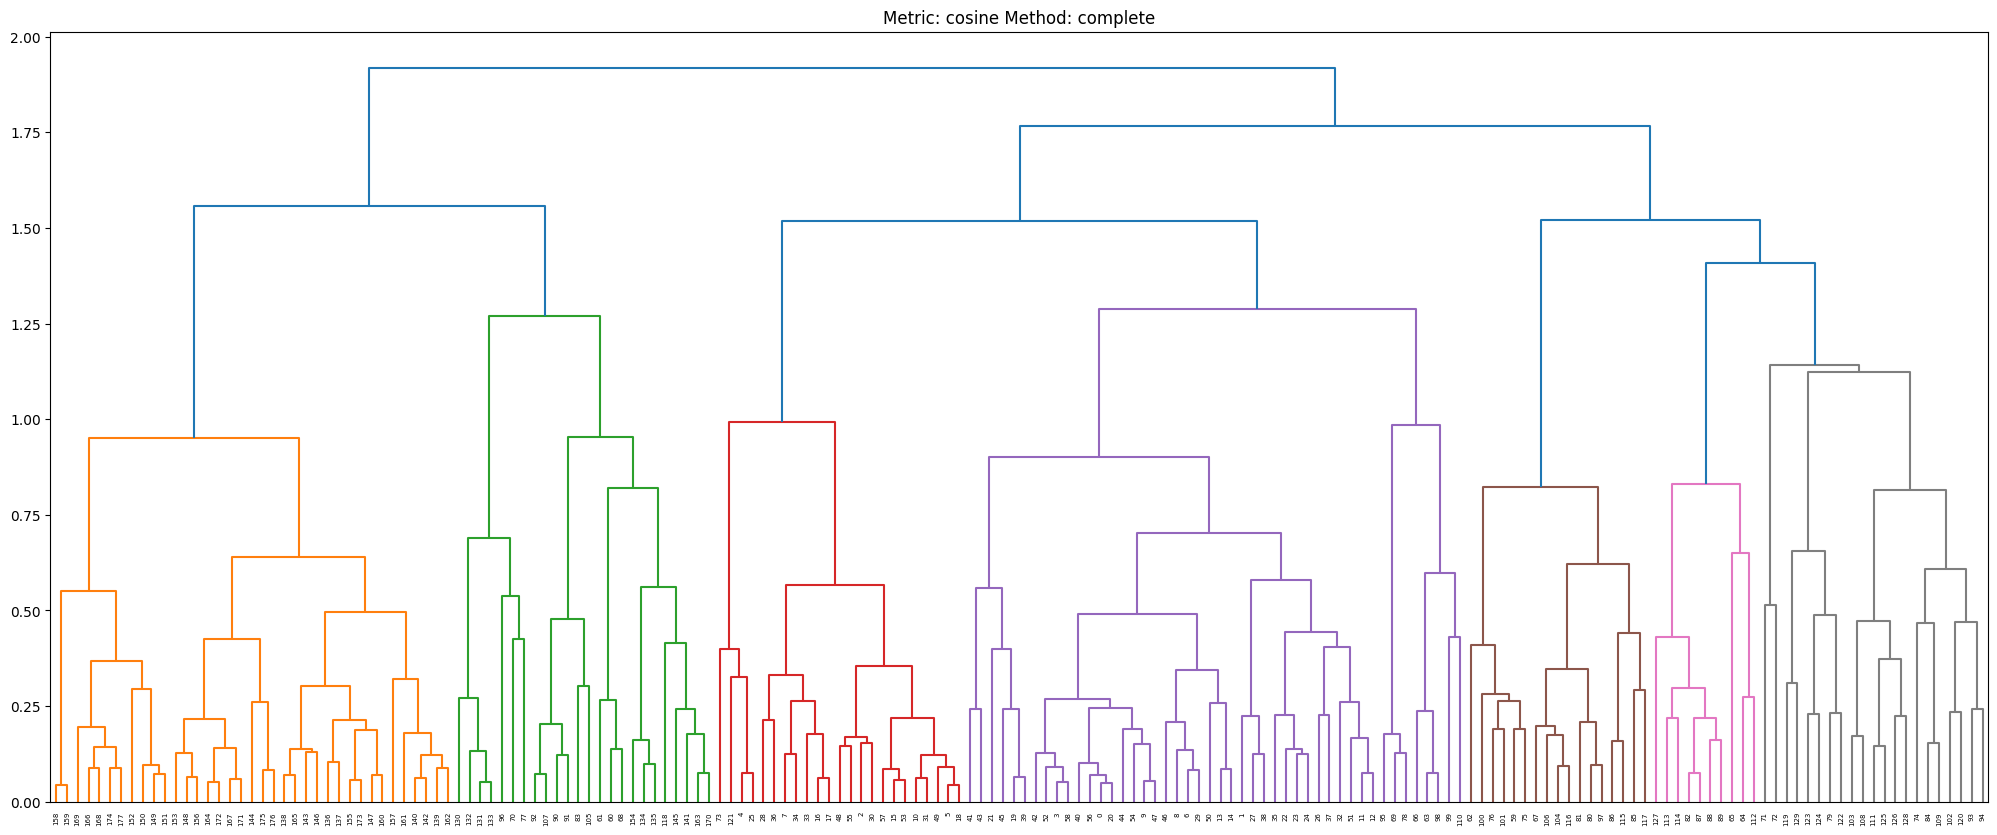

In [49]:
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogramm(w_pd, method, metric='euclidean'):
    cluster_ar = linkage(w_pd, method=method, metric=metric)
    link_df = pd.DataFrame(cluster_ar, index=[f'step {i+1}' for i in range(cluster_ar.shape[0])], columns=['cluster1', 'cluster2', 'dist', 'number elements'] )
    fig = plt.figure(figsize=(25,10))
    row_dendr = dendrogram(link_df)
    plt.title(f'Metric: {metric} Method: {method}')
    plt.show()

metrics = ['euclidean', 'cosine']
methods = ['single', 'complete', 'centroid']

scaler = StandardScaler()
w_pd_scaled = scaler.fit_transform(w_pd)
for metric in metrics:
    for method in methods:
        if method == 'centroid' and metric == 'cosine':
            continue

        plot_dendrogramm(w_pd_scaled, method, metric)

–î–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–µ–Ω–¥—Ä–æ–≥—Ä–∞–º–º –º—ã —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–ª–∏ –¥–∞–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –≤–ª–∏—è–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –±—ã–ª–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º. –î–ª—è —Ä–∞–∑–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫ –∏–º–µ–µ–º –≤–µ—Å—å–º–∞ —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –ú–æ–∂–Ω–æ –∑–¥–µ—Å—å –≤—ã–¥–µ–ª–∏—Ç—å –æ—Ç 2 –¥–æ 5 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.

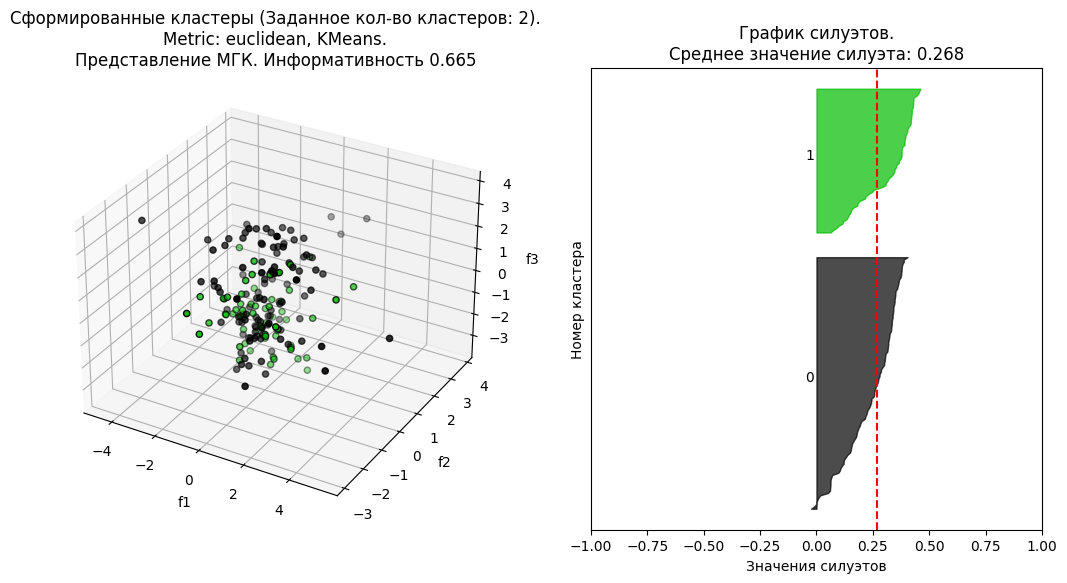

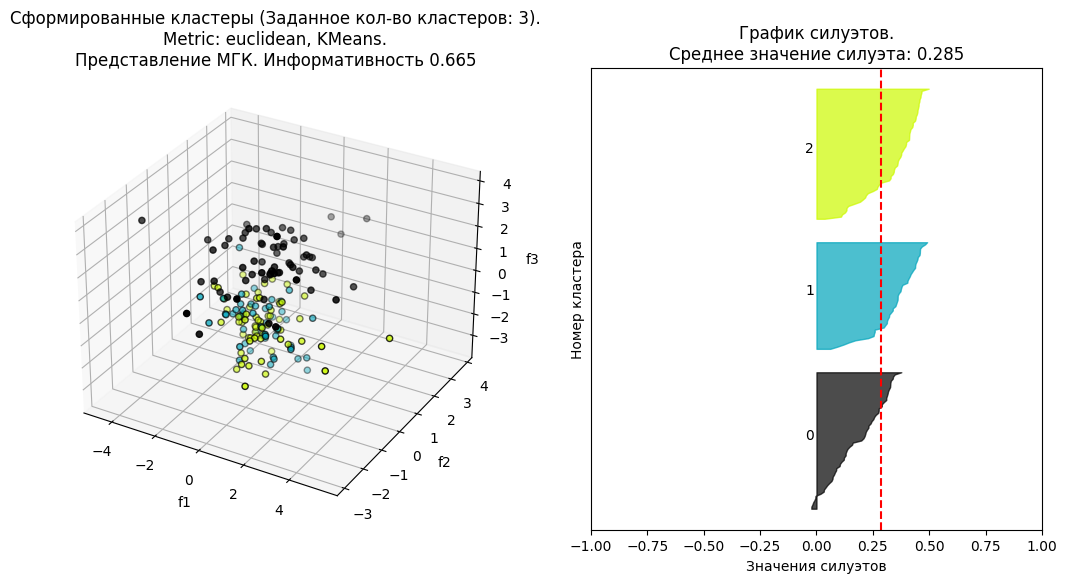

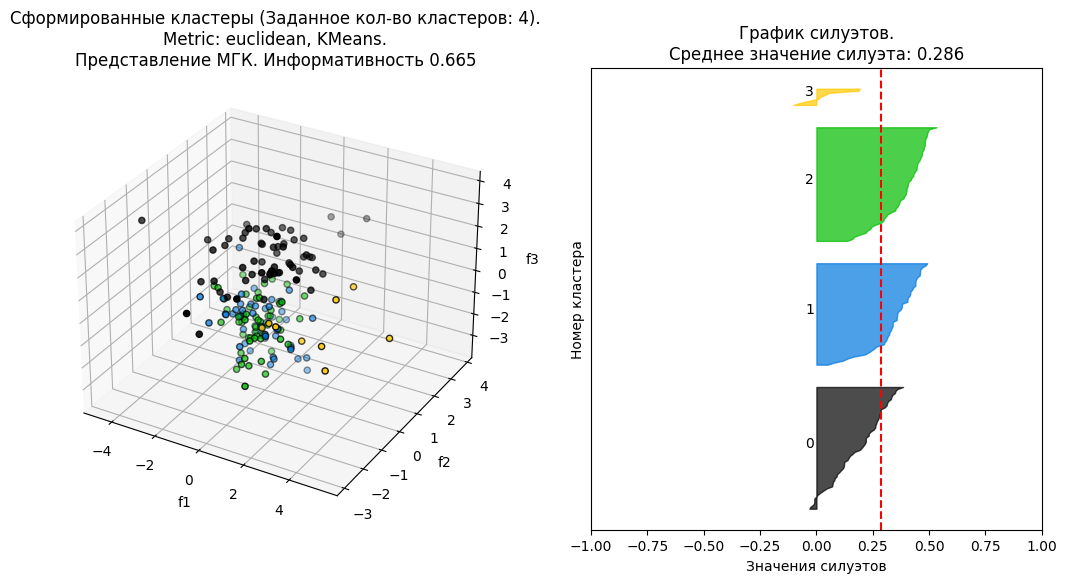

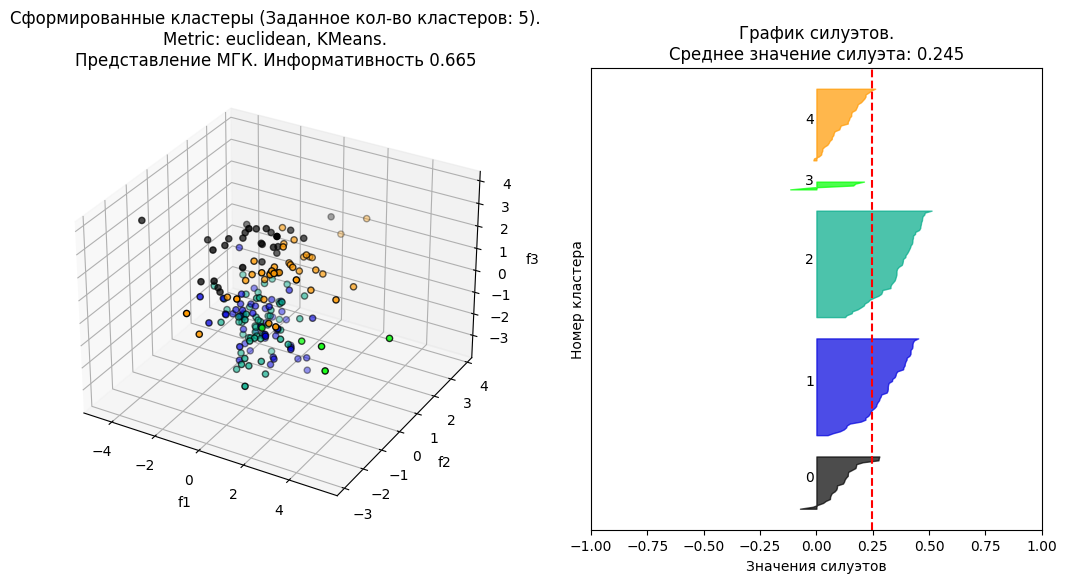

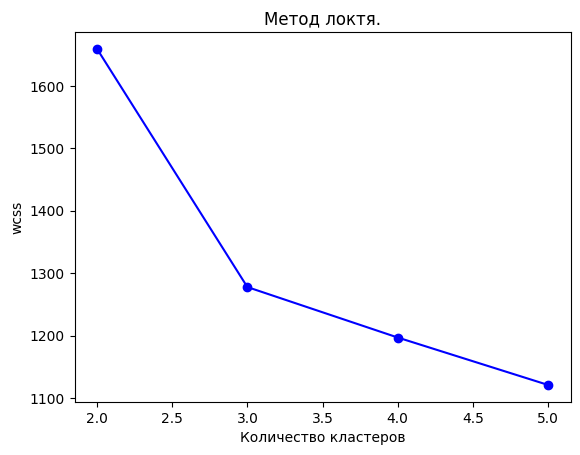

In [50]:
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_clusters_KMeans(data_x, n_clusters, metric='euclidean', as_subplot = False):
    '''–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –ø–æ –º–µ—Ç–æ–¥—É K-—Å—Ä–µ–¥–Ω–∏—Ö –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –Ω–∞ 3–¥ –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ –ú–ì–ö'''
    pca = PCA()
    x_pca = pca.fit_transform(data_x)
    x_pca_pd = pd.DataFrame(x_pca, columns=[ f'f{i}' for i in range(data_x.shape[1])])

    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto').fit(x_pca_pd)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    
    if as_subplot:
        ax = plt.figure(figsize=(12.8,6)).add_subplot(1, 2, 1, projection='3d')
    else:
        ax = plt.axes(projection='3d')
    z = x_pca_pd['f1']
    x = x_pca_pd['f2']
    y = x_pca_pd['f3']
    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
    ax.scatter(x, y, z, c=colors, marker='o', edgecolors=['000']*len(labels))
    ax.set_xlabel('f1')
    ax.set_ylabel('f2')
    ax.set_zlabel('f3')
    ax.set_title(f'–°—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã (–ó–∞–¥–∞–Ω–Ω–æ–µ –∫–æ–ª-–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: {n_clusters}).\nMetric: {metric}, KMeans.\n–ü—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –ú–ì–ö. –ò–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å {sum(pca.explained_variance_ratio_[:3]):.3f}')
    return (labels, inertia)

def plot_silhouettes(silhouette_vals, labels):
    '''–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ —Å–∏–ª—É—ç—Ç–æ–≤'''
    n_clusters = len(set(labels))
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = silhouette_vals[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    silhouette_avg = silhouette_score(data_x, labels)
    plt.title(f"–ì—Ä–∞—Ñ–∏–∫ —Å–∏–ª—É—ç—Ç–æ–≤.\n–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å–∏–ª—É—ç—Ç–∞: {silhouette_avg:.3f}")
    plt.xlabel("–ó–Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—É—ç—Ç–æ–≤")
    plt.ylabel("–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞")
    plt.xlim(-1, 1)
    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([]) # Clear the yaxis labels / ticks

def plot_wcss(n_clusters_var, inertias):
    '''–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Å—É–º–º–∞—Ä–Ω–æ–≥–æ –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è'''
    plt.plot(n_clusters_var, inertias, '-bo')
    plt.ylabel('wcss')
    plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤')
    plt.title('–ú–µ—Ç–æ–¥ –ª–æ–∫—Ç—è.')

scaler = StandardScaler()
data_x = scaler.fit_transform(w_pd.iloc[:,:-1])

inertias = []
n_clusters_var = range(2, 6)
for clusters in n_clusters_var:
    labels, inertia = plot_clusters_KMeans(data_x, clusters, as_subplot=True)
    inertias.append(inertia)
    plt.subplot(1, 2, 2)
    silhouette_vals = silhouette_samples(data_x, labels)
    plot_silhouettes(silhouette_vals, labels)
    plt.show()
    
plot_wcss(n_clusters_var, inertias)
plt.show()

–ü–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –º–µ—Ç–æ–¥–æ–º –ö-—Å—Ä–µ–¥–Ω–∏—Ö —Å–¥–µ–ª–∞–Ω—ã –≥—Ä–∞—Ñ–∏–∫–∏ —Å–∏–ª—É—ç—Ç–æ–≤. –î–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Ä–∞–≤–Ω–æ–µ –∏–ª–∏ –º–µ–Ω–µ–µ 3 –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ —Å–∏–ª—É—ç—Ç—ã –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã –∏ –∫–∞–∂–¥—ã–π –∫–ª–∞—Å—Å –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –±–æ–ª–µ–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—É—ç—Ç–æ–≤. –°–º–æ—Ç—Ä—è, –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Å–∞–º—ã–µ –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –æ—Ç 2 –¥–æ 4.

–ü–æ –º–µ—Ç–æ–¥—É –ª–æ–∫—Ç—è –º–æ–∂–Ω–æ –≤—ã–±—Ä–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Ä–∞–≤–Ω—ã–º 3-4.

–ò—Ç–æ–≥–æ, –≤ –¥–∞–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å –æ—Ç 2 –¥–æ 4 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.